In [1]:
import matplotlib.pyplot as plt
import libertem.api as lt
import numpy as np
from libertem.analysis.getroi import get_roi
import numpy as np

In [2]:
%matplotlib nbagg

# Connection
**more about local conn**

In [3]:
ctx = lt.Context()

In [4]:
params = {'path': '/home/abi/Documents/LiberTEM_data/calibrationData_circularProbe.h5', 'ds_path': '4DSTEM_experiment/data/datacubes/polyAu_4DSTEM/data'}
ds = ctx.load("HDF5", **params)

# SUM_FRAMES
**description**

In [5]:
sum_analysis = ctx.create_sum_analysis(dataset=ds)
roi_params = {'roi': {'shape': 'disk', 'cx': 42, 'cy': 50, 'r': 10.5}}
roi = get_roi(roi_params, ds.shape.nav)
udf = sum_analysis.get_udf()
sum_result = ctx.run_udf(ds, udf, roi, progress=True)

100%|██████████| 2/2 [00:01<00:00,  1.00it/s]


<IPython.core.display.Javascript object>


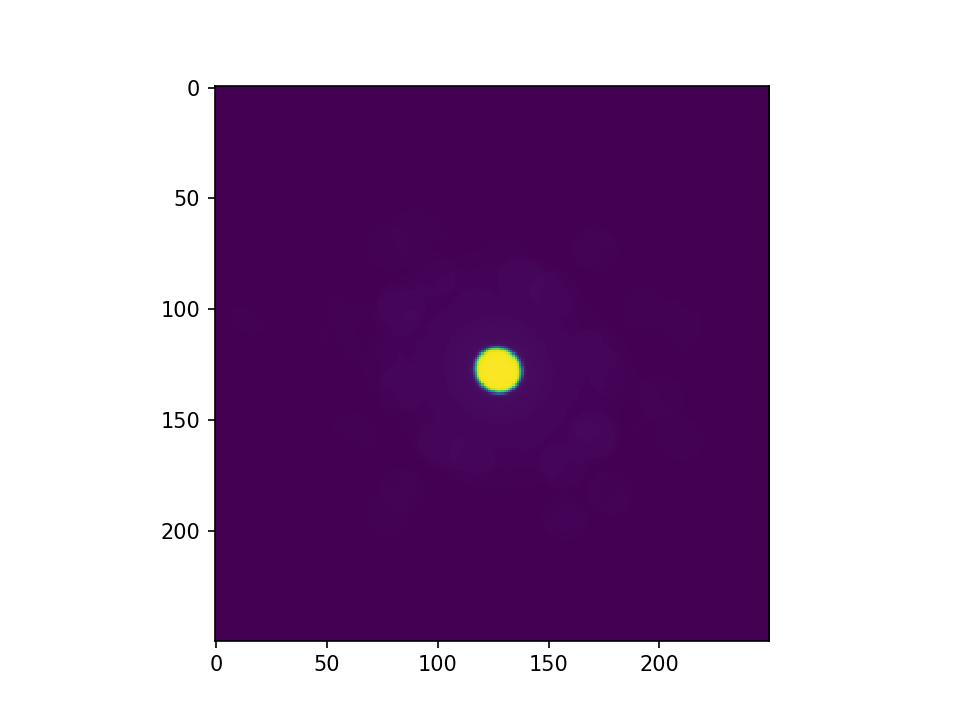

In [6]:
plt.figure()
plt.imshow(sum_result['intensity'].raw_data)

# APPLY_RING_MASK
**description**

In [7]:
ring_analysis = ctx.create_ring_analysis(dataset=ds ,cx=125 ,cy=125 ,ri=62.5 ,ro=125)
roi = None
udf = ring_analysis.get_udf()
ring_result = ctx.run_udf(ds, udf, roi, progress=True)

100%|██████████| 4/4 [00:07<00:00,  1.97s/it]


<IPython.core.display.Javascript object>


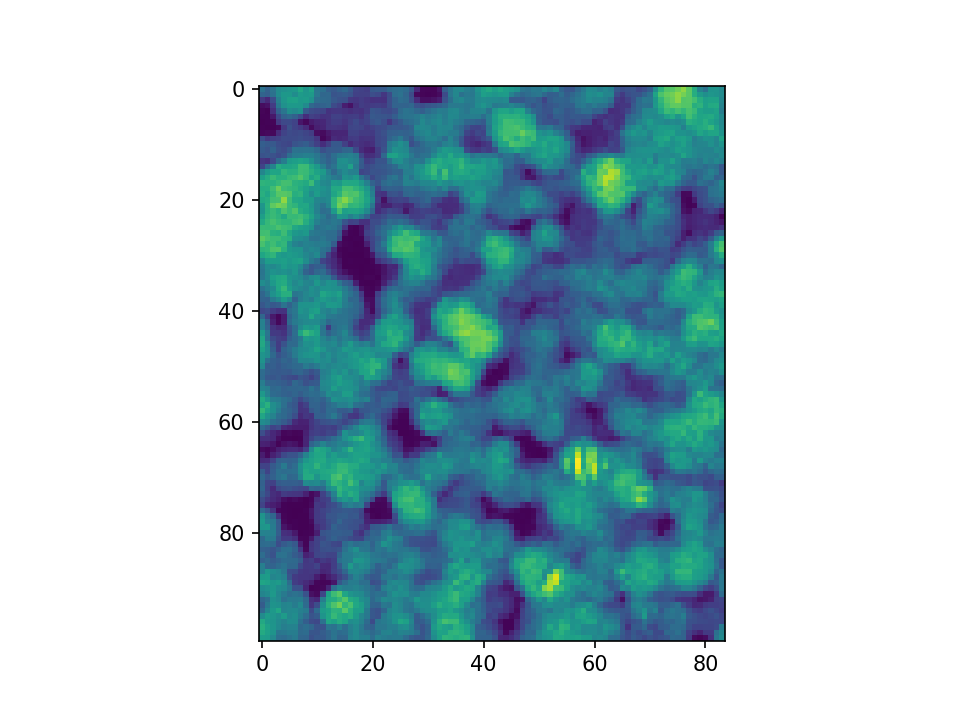

In [8]:
plt.figure()
plt.imshow(np.squeeze(ring_result['intensity'].data))